In [1]:
# import libraries
from config import api_key
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
api = api_key

In [2]:
# query API and set up data frame
url = f'https://api.census.gov/data/2018/abscs?get=EMP,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP_LABEL,ETH_GROUP,ETH_GROUP_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP&for=us:*&key={api}'
res = requests.get(url)
census_data = res.json()
census_df = pd.DataFrame(census_data)

In [3]:
#create columns
census_df.columns = census_df.loc[0]
census_df.drop(0, inplace = True)
census_df['EMP'] = census_df['EMP'].astype(int)
census_df['YIBSZFI'] = census_df['YIBSZFI'].astype(int)
census_df['FIRMPDEMP'] = census_df['FIRMPDEMP'].astype(int)
census_df.sort_values(by= ['YIBSZFI'], ascending=True, inplace=True)
census_df = census_df[['EMP','SEX_LABEL','RACE_GROUP_LABEL','ETH_GROUP_LABEL', 'YIBSZFI','YIBSZFI_LABEL','FIRMPDEMP']].copy()

In [4]:
#check dataframe
census_df

,EMP,SEX_LABEL,RACE_GROUP_LABEL,ETH_GROUP_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP
413,524526,Equally male/female,Equally minority/nonminority,Total,1,All firms,61556
85,146945,Male,Total,Equally Hispanic/non-Hispanic,1,All firms,10229
309,0,Total,American Indian and Alaska Native,Equally Hispanic/non-Hispanic,1,All firms,0
247,174872,Total,American Indian and Alaska Native,Non-Hispanic,1,All firms,20208
246,0,Equally male/female,American Indian and Alaska Native,Equally Hispanic/non-Hispanic,1,All firms,0
...,...,...,...,...,...,...,...
231,44698,Equally male/female,Black or African American,Total,323,Firms with 16 or more years in business,2753
224,235839,Male,Black or African American,Total,323,Firms with 16 or more years in business,15235
217,122126,Female,Black or African American,Total,323,Firms with 16 or more years in business,7484
298,4409,Equally male/female,American Indian and Alaska Native,Total,323,Firms with 16 or more years in business,271


In [5]:
#create pivot table to display number of firms
number_of_firms = census_df[['YIBSZFI_LABEL','FIRMPDEMP']].copy()
number_of_firms = number_of_firms[number_of_firms['YIBSZFI_LABEL'] != 'All firms']
number_of_firms_pivot = number_of_firms.pivot_table(index='YIBSZFI_LABEL', values='FIRMPDEMP', aggfunc=np.sum)
number_of_firms_pivot

,FIRMPDEMP
YIBSZFI_LABEL,
Firms with 11 to 15 years in business,7117388
Firms with 16 or more years in business,15751862
Firms with 2 to 3 years in business,6345683
Firms with 4 to 5 years in business,4774968
Firms with 6 to 10 years in business,8320785
Firms with less than 2 years in business,7387447


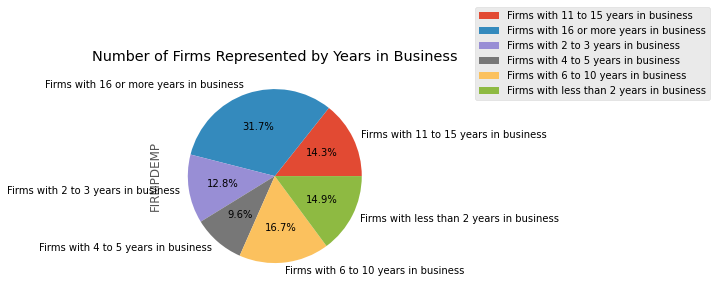

In [10]:
# use pivot table to create pie chart
plt.style.use('ggplot')
number_of_firms_pivot.plot.pie(y='FIRMPDEMP', autopct='%1.1f%%')
plt.title('Number of Firms Represented by Years in Business')
plt.legend(bbox_to_anchor = (1.4,1.3), loc = 'upper left')


In [11]:
#repeat process for number of employees
number_of_employees = census_df[['YIBSZFI_LABEL','EMP']].copy()
number_of_employees = number_of_employees[number_of_employees['YIBSZFI_LABEL'] != 'All firms']
number_of_employees_pivot = number_of_employees.pivot_table(index='YIBSZFI_LABEL', values='EMP', aggfunc=np.sum)
number_of_employees_pivot

,EMP
YIBSZFI_LABEL,
Firms with 11 to 15 years in business,71398505
Firms with 16 or more years in business,372769454
Firms with 2 to 3 years in business,43673066
Firms with 4 to 5 years in business,38665042
Firms with 6 to 10 years in business,77938015
Firms with less than 2 years in business,30982626


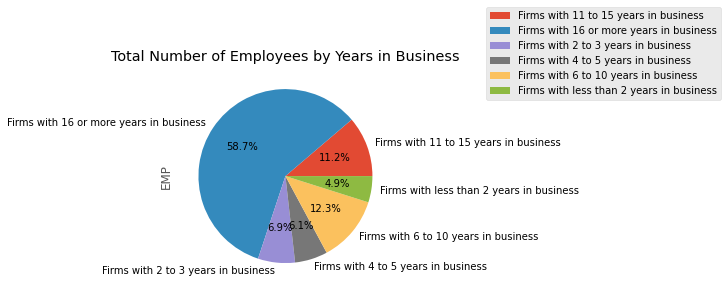

In [13]:
#create pie chart
plt.style.use('ggplot')
number_of_employees_pivot.plot.pie(y='EMP', autopct='%1.1f%%')
plt.title('Total Number of Employees by Years in Business')
plt.legend(bbox_to_anchor = (1.4,1.3), loc = 'upper left')

In [28]:
#create dataframe to make visuals from race demographic makeup
census_race = census_df.copy()
census_race = census_race[census_race['YIBSZFI_LABEL'] != 'All firms'].copy()
census_race = census_race[census_race['RACE_GROUP_LABEL'] != 'Total'].copy()
census_race = census_race[(census_race['RACE_GROUP_LABEL'] != 'Classifiable')&(census_race['RACE_GROUP_LABEL'] != 'Unclassifiable')].copy()
census_race = census_race[(census_race['RACE_GROUP_LABEL'] != 'Minority')&(census_race['RACE_GROUP_LABEL'] != 'Nonminority')].copy()

In [29]:
#create and check pivot table
census_race = census_race[['EMP','RACE_GROUP_LABEL', 'YIBSZFI', 'YIBSZFI_LABEL']].copy()
census_race_pivot = census_race.pivot_table(index='YIBSZFI',columns ='RACE_GROUP_LABEL', values='EMP', aggfunc=np.sum)
census_race_pivot.sort_values(by=['YIBSZFI'], ascending=False, inplace=True)
census_race_pivot

RACE_GROUP_LABEL,American Indian and Alaska Native,Asian,Black or African American,Equally minority/nonminority,Native Hawaiian and Other Pacific Islander,White
YIBSZFI,,,,,,
323,277233,5016909,1207945,633733,69614,97111160
322,100552,2187907,607636,257640,19243,20452062
321,92764,2900680,705222,301476,11535,21873039
319,37012,1502883,392310,180662,10526,10806644
318,50435,2193405,395821,171681,13825,11792754
311,33179,1452485,237304,133330,13071,8543807


[Text(0, 0, '16+ years in business'),
 Text(0, 1, '11-15 years in business'),
 Text(0, 2, '6-10 years in business'),
 Text(0, 3, '4-5 years in business'),
 Text(0, 4, '2-3 years in business'),
 Text(0, 5, 'Less than 2 years in business')]

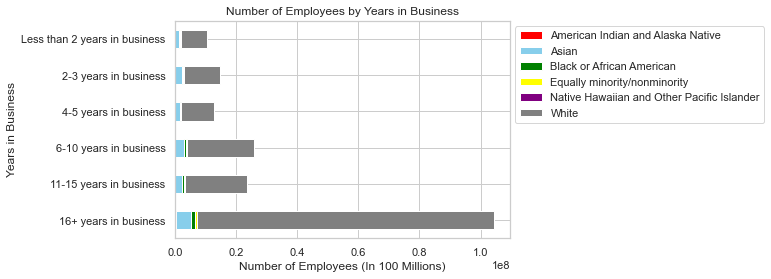

In [30]:
#create stacked bar chart
sns.set_theme(style="whitegrid")
g = census_race_pivot.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'purple', 'gray'], rot=90)
plt.xlabel('Number of Employees (In 100 Millions)')
plt.ylabel('Years in Business')
 
# title of plot
plt.title('Number of Employees by Years in Business')
plt.yticks(rotation=360)
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
g.set_yticklabels(['16+ years in business', '11-15 years in business', '6-10 years in business', '4-5 years in business', '2-3 years in business', 'Less than 2 years in business'])

In [31]:
#filter out white to create non-white employee visual
census_race = census_race[census_race['RACE_GROUP_LABEL'] != 'White'].copy()

In [32]:
#recreate pivot table
census_race = census_race[['EMP','RACE_GROUP_LABEL', 'YIBSZFI', 'YIBSZFI_LABEL']].copy()
census_race_pivot = census_race.pivot_table(index='YIBSZFI',columns ='RACE_GROUP_LABEL', values='EMP', aggfunc=np.sum)
census_race_pivot.sort_values(by=['YIBSZFI'], ascending=False, inplace=True)
census_race_pivot

RACE_GROUP_LABEL,American Indian and Alaska Native,Asian,Black or African American,Equally minority/nonminority,Native Hawaiian and Other Pacific Islander
YIBSZFI,,,,,
323,277233,5016909,1207945,633733,69614
322,100552,2187907,607636,257640,19243
321,92764,2900680,705222,301476,11535
319,37012,1502883,392310,180662,10526
318,50435,2193405,395821,171681,13825
311,33179,1452485,237304,133330,13071


[Text(0, 0, '16+ years in business'),
 Text(0, 1, '11-15 years in business'),
 Text(0, 2, '6-10 years in business'),
 Text(0, 3, '4-5 years in business'),
 Text(0, 4, '2-3 years in business'),
 Text(0, 5, 'Less than 2 years in business')]

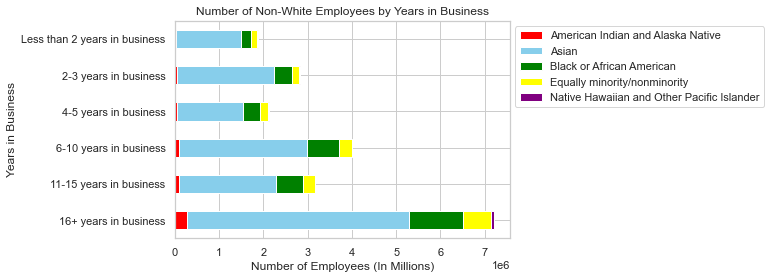

In [33]:
#create visual
sns.set_theme(style="whitegrid")
g = census_race_pivot.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'purple',], rot=90)
plt.xlabel('Number of Employees (In Millions)')
plt.ylabel('Years in Business')
plt.title('Number of Non-White Employees by Years in Business')
plt.yticks(rotation=360)
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
g.set_yticklabels(['16+ years in business', '11-15 years in business', '6-10 years in business', '4-5 years in business', '2-3 years in business', 'Less than 2 years in business'])

#322